# List of Exercises 1 - Exercise 4

*Student: Luigi Lucas de Carvalho Silva / luigi.lcsilva@gmail.com*

First of all, let us import some useful packages.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import scipy.integrate as integrate
import scipy.special as special
import scipy.interpolate as interpolate
import scipy.stats as stats

Defining the uniform distribution.

In [2]:
### Definition of the uniform distribution.
def uniform_dist(x, i, f):
    'i and f are the beginning and the end of the interval.'
    if i <= x <= f:
        y = 1/(f-i)
    else:
        y = 0
    return y

Defining the gaussian function.

In [3]:
### Gaussian distribution definition.
def gaussian(x, mu, sigma):
    g = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2)) 
    return g

Defining the gaussian CDF.

In [4]:
### "Exact" gaussian CDF function definition.
def gaussian_cdf(x, mu, sigma):
    cdf = (special.erf((x-mu)/(np.sqrt(2)*sigma)) + 1)/2 
    return cdf

Defining common parameters for the distributions.

In [5]:
### Common parameters for the uniform distribution.
initial_unif=0
final_unif=1

### Common parameters for the gaussian.
mu_gauss = 0
sigma_gauss = 1

Defining the gaussian inverse CDF.

In [6]:
### Points for interpolation. Here I get x points that are inside some sigmas around the mean.
n_sigma_gauss = 6
step_gauss = 2*n_sigma_gauss*sigma_gauss/(10**(n_sigma_gauss-1))
x_min_gauss = mu_gauss-n_sigma_gauss*sigma_gauss
x_max_gauss = mu_gauss+n_sigma_gauss*sigma_gauss

x_values_gauss = np.arange(x_min_gauss, x_max_gauss, step_gauss)
cdf_values_gauss = gaussian_cdf(x_values_gauss, mu_gauss, sigma_gauss)

### Defining the inverse CDF from a cubic interpolation using scipy.interpolate:
scipy_inverse_gauss_cdf = interpolate.interp1d(cdf_values_gauss, x_values_gauss, kind='cubic')

Defining some estimators.

In [7]:
def mean_est(x):
    'x must be an array with more than 1 number.'
    mean = x.sum()/len(x)
    return mean

def var_est(x, mean):
    'x must be an array with more than 1 number.'
    var = ((x-mean)**2).sum()/len(x)
    return var

def skew_est(x, mean, var):
    'x must be an array with more than 1 number.'
    skew = (1/(len(x)*var**(3/2)))*((x-mean)**3).sum()
    return skew

def curtosis_est(x, mean, var):
    'x must be an array with more than 1 number.'
    curtosis = (1/(len(x)*var**2))*((x-mean)**4).sum() - 3
    return curtosis

def cov_est(x, x_mean, y, y_mean):
    'len(x) must be equal to len(y)!'
    cov = (1/len(x))*((x-x_mean)*(y-y_mean)).sum()
    return cov
    
def corr_est(cov, sigma_x, sigma_y):
    corr = cov/(sigma_x*sigma_y)
    return corr

## Exercise 4 - Letter a)

Here, I will generate random numbers from the uniform and the gaussian distributions, and then I will compute covariance and correlation.

In [8]:
### Quantity of numbers to be generated.
rnd_quantities = np.arange(100, 4000, 200)

unif_mean = []
unif_std = []
gauss_mean = []
gauss_std = []
covariance = []
correlation = []

j=1
for i in rnd_quantities:
    ##############################
    ### UNIFORM RANDOM NUMBERS ###
    ##############################
    ### Seed for the random numbers. Comment if you don't want "fixed" random numbers.
    np.random.seed(seed=j)

    ### Generating the random numbers.
    x_unif = np.random.random_sample(size=i)
    
    ###############################
    ### GAUSSIAN RANDOM NUMBERS ###
    ###############################
    ### Seed for the random numbers. Comment if you don't want "fixed" random numbers.
    np.random.seed(seed=j+1)

    ### Generating some uniform random numbers.
    unif_random = np.random.random_sample(size=i)

    ### Generating some gaussian random numbers.
    x_gauss = scipy_inverse_gauss_cdf(unif_random)

    #####################################
    ### MEANS AND STANDARD DEVIATIONS ###
    #####################################
    x_unif_mean = mean_est(x_unif)
    unif_mean.append(x_unif_mean)
    
    x_gauss_mean = mean_est(x_gauss)
    gauss_mean.append(x_gauss_mean)

    x_unif_std = np.sqrt(var_est(x_unif, x_unif_mean))
    unif_std.append(x_unif_std)
    
    x_gauss_std = np.sqrt(var_est(x_gauss, x_gauss_mean))
    gauss_std.append(x_gauss_std)
    
    ##################################
    ### COVARIANCE AND CORRELATION ###
    ##################################
    cov_unif_gauss = cov_est(x_unif, x_unif_mean, x_gauss, x_gauss_mean)
    covariance.append(cov_unif_gauss)
    
    corr_unif_gauss = corr_est(cov_unif_gauss, x_unif_std, x_gauss_std)
    correlation.append(corr_unif_gauss)
    
    j+=1

Putting in a dataframe for better visualization.

In [9]:
df_stat = pd.DataFrame()

### Defining new dataframes with the data.
df_quantities = pd.DataFrame(data=rnd_quantities)
df_unif_mean = pd.DataFrame(data=unif_mean)
df_gauss_mean = pd.DataFrame(data=gauss_mean)
df_unif_std = pd.DataFrame(data=unif_std)
df_gauss_std = pd.DataFrame(data=gauss_std)
df_covariance = pd.DataFrame(data=covariance)
df_correlation = pd.DataFrame(data=correlation)
   
### Concatening these dataframes with the main one.
df_stat = pd.concat((df_stat,df_quantities),axis=1)
df_stat = pd.concat((df_stat,df_unif_mean),axis=1)
df_stat = pd.concat((df_stat,df_gauss_mean),axis=1)
df_stat = pd.concat((df_stat,df_unif_std),axis=1)
df_stat = pd.concat((df_stat,df_gauss_std),axis=1)
df_stat = pd.concat((df_stat,df_covariance),axis=1)
df_stat = pd.concat((df_stat,df_correlation),axis=1)

df_stat.columns = ['N','unif_mean', 'gauss_mean', 'unif_std', 'gauss_std', 'cov', 'corr']

df_stat

,N,unif_mean,gauss_mean,unif_std,gauss_std,cov,corr
0,100,0.485878,-0.118121,0.294402,0.920653,0.044160,0.162926
1,300,0.490045,-0.040834,0.281168,0.935266,0.022559,0.085788
2,500,0.494985,0.063013,0.281136,0.950578,0.010546,0.039461
3,700,0.507036,-0.008787,0.293028,1.003156,0.007581,0.025789
4,900,0.496177,0.013958,0.286822,0.986215,-0.014809,-0.052354
5,1100,0.505923,-0.010670,0.290419,0.993615,-0.003731,-0.012929
6,1300,0.493898,0.004861,0.290197,0.991495,-0.010826,-0.037626
7,1500,0.500679,0.012366,0.283047,0.970607,-0.005669,-0.020636
8,1700,0.501957,-0.010592,0.283204,1.007974,0.000335,0.001174
9,1900,0.499771,0.022005,0.292266,0.967157,-0.009131,-0.032304


For something about N=2000 we already have a covariance that is zero in two decimal places.

## Exercise 4 - Letter b)

Let us compute the same things of letter a) for the new sets $\{x_i, y_i+x_i\}$ and $\{x_i, y_i-x_i\}$, where $x_i$ refers to the uniform distribution and $y_i$ refers to the gaussian distribution.

In [10]:
### Quantity of numbers to be generated.
rnd_quantities = np.arange(500, 10500, 500)

unif_mean = []
unif_std = []
set1_mean = []
set1_std = []
set2_mean = []
set2_std = []
unif_set1_cov = []
unif_set1_corr = []
unif_set2_cov = []
unif_set2_corr = []

j=1
for i in rnd_quantities:
    ##############################
    ### UNIFORM RANDOM NUMBERS ###
    ##############################
    ### Seed for the random numbers. Comment if you don't want "fixed" random numbers.
    np.random.seed(seed=j)

    ### Generating the random numbers.
    x_unif = np.random.random_sample(size=i)
    
    ###############################
    ### GAUSSIAN RANDOM NUMBERS ###
    ###############################
    ### Seed for the random numbers. Comment if you don't want "fixed" random numbers.
    np.random.seed(seed=j+1)

    ### Generating some uniform random numbers.
    unif_random = np.random.random_sample(size=i)

    ### Generating some gaussian random numbers.
    x_gauss = scipy_inverse_gauss_cdf(unif_random)

    ###############################
    ########### NEW SETS ##########
    ###############################    
    y_set1 = x_gauss + x_unif
    y_set2 = x_gauss - x_unif
    
    #####################################
    ### MEANS AND STANDARD DEVIATIONS ###
    #####################################
    x_unif_mean = mean_est(x_unif)
    unif_mean.append(x_unif_mean)
    
    y_set1_mean = mean_est(y_set1)
    set1_mean.append(y_set1_mean)
    
    y_set2_mean = mean_est(y_set2)
    set2_mean.append(y_set2_mean)

    x_unif_std = np.sqrt(var_est(x_unif, x_unif_mean))
    unif_std.append(x_unif_std)
    
    y_set1_std = np.sqrt(var_est(y_set1, y_set1_mean))
    set1_std.append(y_set1_std)
    
    y_set2_std = np.sqrt(var_est(y_set2, y_set2_mean))
    set2_std.append(y_set2_std)
    
    ##################################
    ### COVARIANCE AND CORRELATION ###
    ##################################
    cov_unif_set1 = cov_est(x_unif, x_unif_mean, y_set1, y_set1_mean)
    unif_set1_cov.append(cov_unif_set1)
    
    cov_unif_set2 = cov_est(x_unif, x_unif_mean, y_set2, y_set2_mean)
    unif_set2_cov.append(cov_unif_set2)
    
    corr_unif_set1 = corr_est(cov_unif_set1, x_unif_std, y_set1_std)
    unif_set1_corr.append(corr_unif_set1)
    
    corr_unif_set2 = corr_est(cov_unif_set2, x_unif_std, y_set2_std)
    unif_set2_corr.append(corr_unif_set2)
    
    j+=1

Putting in a dataframe for better visualization.

In [11]:
df_stat = pd.DataFrame()

### Defining new dataframes with the data.
df_quantities = pd.DataFrame(data=rnd_quantities)
df_unif_mean = pd.DataFrame(data=unif_mean)
df_set1_mean = pd.DataFrame(data=set1_mean)
df_set2_mean = pd.DataFrame(data=set2_mean)
df_unif_std = pd.DataFrame(data=unif_std)
df_set1_std = pd.DataFrame(data=set1_std)
df_set2_std = pd.DataFrame(data=set2_std)
df_unif_set1_cov = pd.DataFrame(data=unif_set1_cov)
df_unif_set2_cov = pd.DataFrame(data=unif_set2_cov)
df_unif_set1_corr = pd.DataFrame(data=unif_set1_corr)
df_unif_set2_corr = pd.DataFrame(data=unif_set2_corr)

### Concatening these dataframes with the main one.
df_stat = pd.concat((df_stat,df_quantities),axis=1)
df_stat = pd.concat((df_stat,df_unif_mean),axis=1)
df_stat = pd.concat((df_stat,df_set1_mean),axis=1)
df_stat = pd.concat((df_stat,df_set2_mean),axis=1)
df_stat = pd.concat((df_stat,df_unif_std),axis=1)
df_stat = pd.concat((df_stat,df_set1_std),axis=1)
df_stat = pd.concat((df_stat,df_set2_std),axis=1)
df_stat = pd.concat((df_stat,df_unif_set1_cov),axis=1)
df_stat = pd.concat((df_stat,df_unif_set2_cov),axis=1)
df_stat = pd.concat((df_stat,df_unif_set1_corr),axis=1)
df_stat = pd.concat((df_stat,df_unif_set2_corr),axis=1)

df_stat.columns = ['N','unif_mean', 'set1_mean', 'set2_mean', 'unif_std', 'set1_std', 'set2_std', 'unif_set1_cov',
                   'unif_set2_cov', 'unif_set1_corr', 'unif_set2_corr']

df_stat

,N,unif_mean,set1_mean,set2_mean,unif_std,set1_std,set2_std,unif_set1_cov,unif_set2_cov,unif_set1_corr,unif_set2_corr
0,500,0.508277,0.485206,-0.531348,0.296530,0.991572,1.039616,0.063533,-0.112327,0.216077,-0.364369
1,1000,0.487407,0.506624,-0.468189,0.283834,1.015303,1.013406,0.081524,-0.079600,0.282894,-0.276734
2,1500,0.504880,0.523383,-0.486376,0.284204,1.033600,1.040309,0.077293,-0.084250,0.263123,-0.284957
3,2000,0.502390,0.528163,-0.476617,0.290079,1.027065,1.027833,0.083751,-0.084540,0.281110,-0.283547
4,2500,0.503825,0.523820,-0.483830,0.286896,1.026033,1.040864,0.074646,-0.089973,0.253582,-0.301297
5,3000,0.510750,0.490641,-0.530859,0.288456,1.030087,1.035477,0.080424,-0.085990,0.270663,-0.287892
6,3500,0.496361,0.495506,-0.497217,0.287160,1.023903,1.033518,0.077516,-0.087406,0.263637,-0.294510
7,4000,0.495509,0.486096,-0.504922,0.286971,1.017981,1.026190,0.078157,-0.086548,0.267541,-0.293894
8,4500,0.498363,0.466789,-0.529936,0.285333,1.045099,1.050602,0.078532,-0.084298,0.263352,-0.281207
9,5000,0.490348,0.496739,-0.483957,0.290066,1.020219,1.036909,0.075555,-0.092721,0.255313,-0.308278


Covariance and correlation are not zero anymore.

## Exercise 4 - Letter c)

Defining the sets for some fixed N.

In [12]:
N = 10000

np.random.seed(seed=1)
x_unif = np.random.random_sample(size=N)

np.random.seed(seed=2)
unif_random = np.random.random_sample(size=N)
x_gauss = scipy_inverse_gauss_cdf(unif_random)

y_set1 = x_gauss + x_unif
y_set2 = x_gauss - x_unif

Making scatter plots.

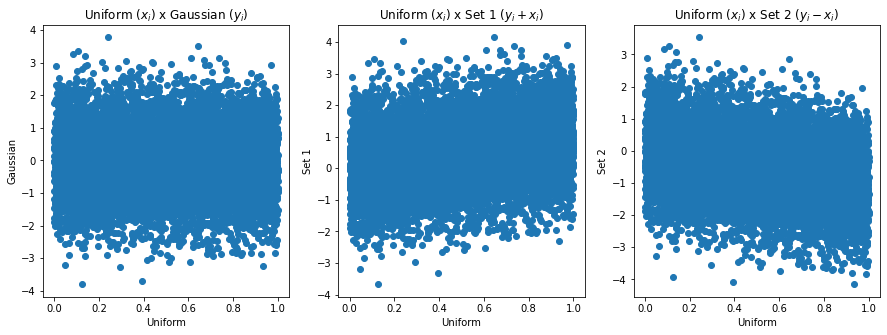

In [13]:
### Defining the figure and axis.
figure, axis = plt.subplots(1, 3, figsize=(15,5))

#########################
### FIRST PLOT ###
axis[0].scatter(x_unif, x_gauss)
axis[0].set_title('Uniform ($x_i$) x Gaussian ($y_i$)')
axis[0].set_xlabel('Uniform')
axis[0].set_ylabel('Gaussian')
#axis[0].set_ylim(-0.1, 2)

#########################
### SECOND PLOT ###
axis[1].scatter(x_unif, y_set1)
axis[1].set_title('Uniform ($x_i$) x Set 1 ($y_i + x_i$)')
axis[1].set_xlabel('Uniform')
axis[1].set_ylabel('Set 1')
#axis[1].set_ylim(-0.1, 2)

#########################
### THIRD PLOT ###
axis[2].scatter(x_unif, y_set2)
axis[2].set_title('Uniform ($x_i$) x Set 2 ($y_i - x_i$)')
axis[2].set_xlabel('Uniform')
axis[2].set_ylabel('Set 2')
#axis[2].set_ylim(-0.1, 2)

plt.show()

This is in agreement with the previous results. The first plot has basically no correlation, while the second and third plots have some positive and negative correlation, respectively.